# Task
- Import data and libraries
- Data wrangling and cleaning
- Plotting a choropleth
- Results

In [1]:
# Import data and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path  = r'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [4]:
path

'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [5]:
# Importing df_clean dataset 

df_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'school_snapshot_clean.csv'), index_col = False)

### Exported 2019 - 2020 School Locations data from NYC open data 
https://data.cityofnewyork.us/Education/2019-2020-School-Locations/wg9x-4ke6/about_data

In [6]:
# Importing new data set to insert location with a dataframe merger later on

df_location = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '2019_-_2020_School_Locations_20240221.csv'),index_col = False)

In [7]:
# Check the output of df_location
df_location.head()

fiscal_year system_code location_code                 location_name  \
0         2020      15K001          K001           P.S. 001 The Bergen   
1         2020      17K002          K002  Parkside Preparatory Academy   
2         2020      13K003          K003  P.S. 003 The Bedford Village   
3         2020      75K004          K004                     P.S. K004   
4         2020      16K005          K005    P.S. 005 Dr. Ronald McNair   

           BEDS Managed_by_name location_type_description  \
0  331500010001             DOE          General Academic   
1  331700010002             DOE          General Academic   
2  331300010003             DOE          General Academic   
3  307500013004             DOE         Special Education   
4  331600010005             DOE          General Academic   

     Location_Category_Description              Grades_text  \
0                       Elementary  PK,0K,01,02,03,04,05,SE   
1  Junior High-Intermediate-Middle              06,07,08,SE   
2                       Elementary  PK,0K,01,02,03,04,05,SE   
3                       Elementary  PK,0K,01,02,03,04,05,SE   
4                       Elementary  PK,0K,01,02,03,04,05,SE   

               Grades_final_text  ...  Administrative_District_Name  \
0           PK,0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 15   
1                       06,07,08  ...  COMMUNITY SCHOOL DISTRICT 17   
2           PK,0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 13   
3  PK,0K,01,02,03,04,05,06,07,SE  ...    CITYWIDE SPECIAL EDUCATION   
4           PK,0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 16   

  community_school_sup_name            Tier_3_Support_Location_Name  \
0               SKOP, ANITA  NYCDOE Borough Office - Brooklyn North   
1           ELLIS, CLARENCE  NYCDOE Borough Office - Brooklyn South   
2            SAMUELS, KAMAR  NYCDOE Borough Office - Brooklyn North   
3        LOUISSAINT, KETLER                        D75 CITYWIDE BCO   
4           MARTIN, YOLANDA  NYCDOE Borough Office - Brooklyn North   

  Tier_3_Support_Leader_Name           Tier_2_Support_Location_Name  \
0                        NaN  School Support Team 5- Brooklyn North   
1        Mauriciere de Govia  School Support Team 2- Brooklyn South   
2                        NaN  School Support Team 3- Brooklyn North   
3            Tillman Roberto             Children First Network 752   
4                        NaN  School Support Team 4- Brooklyn North   

   HighSchool_Network_Location_Code  HighSchool_Network_Name  \
0                               NaN                      NaN   
1                               NaN                      NaN   
2                               NaN                      NaN   
3                               NaN                      NaN   
4                               NaN                      NaN   

   HighSchool_Network_Superintendent  Community_district 1  Police_precinct  
0                                NaN                 307.0             72.0  
1                                NaN                 309.0             71.0  
2                                NaN                 303.0             79.0  
3                                NaN                 305.0             75.0  
4                                NaN                 303.0             81.0  

[5 rows x 41 columns]

In [8]:
# Check the output of df_clean
df_clean.head()

Unnamed: 0 District Borough Number                School Name     Year  \
0           0                  01M015  P.S. 015 Roberto Clemente  2013-14   
1           1                  01M015  P.S. 015 Roberto Clemente  2014-15   
2           2                  01M015  P.S. 015 Roberto Clemente  2015-16   
3           3                  01M015  P.S. 015 Roberto Clemente  2016-17   
4           4                  01M015  P.S. 015 Roberto Clemente  2017-18   

   Total Enrollment  Grade PK (Half Day & Full Day)  Grade K  Grade 1  \
0               190                              26       39       39   
1               183                              18       27       47   
2               176                              14       32       33   
3               178                              17       28       33   
4               190                              17       28       32   

   Grade 2  Grade 3  ...  % Male  % Asian  % Black  % Hispanic  \
0       21       16  ...    51.1      4.7     37.9        54.7   
1       31       19  ...    54.1      4.4     35.5        58.5   
2       39       23  ...    52.8      5.1     32.4        59.7   
3       27       31  ...    53.4      7.9     28.7        59.0   
4       33       23  ...    47.9     10.5     27.4        57.9   

   % Multiple Race Categories Not Represented  % White  \
0                                         1.1      1.6   
1                                         0.5      1.1   
2                                         1.7      1.1   
3                                         2.2      2.2   
4                                         1.1      3.2   

   % Students with Disabilities  % English Language Learners  % Poverty  \
0                          34.2                         10.0       90.0   
1                          35.0                          9.3       92.3   
2                          34.1                          9.1       84.7   
3                          28.7                          6.7       85.4   
4                          23.7                          4.2       84.7   

   Economic Need Index  
0              No Data  
1                93.5%  
2                89.6%  
3                89.2%  
4                89.0%  

[5 rows x 30 columns]

In [9]:
# Check shape on df_location
df_location.shape

(2190, 41)

In [10]:
# Check shape on df_clean
df_clean.shape

(8972, 30)

# Data wrangling and cleaning

In [11]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fiscal_year                        2190 non-null   int64  
 1   system_code                        2190 non-null   object 
 2   location_code                      2190 non-null   object 
 3   location_name                      2190 non-null   object 
 4   BEDS                               2190 non-null   int64  
 5   Managed_by_name                    2190 non-null   object 
 6   location_type_description          2190 non-null   object 
 7   Location_Category_Description      2190 non-null   object 
 8   Grades_text                        2103 non-null   object 
 9   Grades_final_text                  2102 non-null   object 
 10  open_date                          2190 non-null   object 
 11  Status_descriptions                2190 non-null   objec

In [12]:
# Looking at basic stats for consistency check
df_location.describe()

fiscal_year          BEDS  X_COORDINATE   Y_COORDINATE    LONGITUDE  \
count       2190.0  2.190000e+03  2.189000e+03    2189.000000  2189.000000   
mean        2020.0  3.270190e+11  1.004775e+06  208034.191868   -73.750800   
std            0.0  1.234571e+10  4.604875e+04   31647.315226     3.530418   
min         2020.0  3.075000e+11  0.000000e+00       0.000000   -74.243950   
25%         2020.0  3.207009e+11  9.953920e+05  184729.000000   -73.959484   
50%         2020.0  3.313009e+11  1.006076e+06  205239.000000   -73.920851   
75%         2020.0  3.323000e+11  1.016758e+06  237567.000000   -73.881894   
max         2020.0  3.531009e+11  1.065003e+06  268380.000000     0.000000   

          LATITUDE  Community_district  Council-district   Census_tract  \
count  2189.000000         2189.000000       2189.000000    2187.000000   
mean     40.645046          268.582458         24.159890   36540.544134   
std       1.947066          112.027791         14.446745   34055.675141   
min       0.000000            0.000000          0.000000      13.000000   
25%      40.672710          203.000000         12.000000   13350.000000   
50%      40.729700          303.000000         23.000000   25100.000000   
75%      40.818703          317.000000         37.000000   46202.000000   
max      40.903275          503.000000         51.000000  162100.000000   

       Borough_block_lot  Geographical_District_code  \
count       2.189000e+03                 2190.000000   
mean        2.618429e+09                   15.276712   
std         1.168853e+09                    9.180150   
min         0.000000e+00                    0.000000   
25%         2.025270e+09                    8.000000   
50%         3.011480e+09                   14.000000   
75%         3.075530e+09                   23.000000   
max         5.078980e+09                   32.000000   

       Administrative_District_Code  Community_district 1  Police_precinct  
count                   2190.000000           2189.000000      2181.000000  
mean                      26.266667            268.582458        64.208620  
std                       25.953663            112.027791        32.490253  
min                        1.000000              0.000000         1.000000  
25%                        9.000000            203.000000        42.000000  
50%                       18.000000            303.000000        66.000000  
75%                       29.000000            317.000000        88.000000  
max                       84.000000            503.000000       123.000000

In [13]:
df_location.head(100)

fiscal_year system_code location_code                 location_name  \
0          2020      15K001          K001           P.S. 001 The Bergen   
1          2020      17K002          K002  Parkside Preparatory Academy   
2          2020      13K003          K003  P.S. 003 The Bedford Village   
3          2020      75K004          K004                     P.S. K004   
4          2020      16K005          K005    P.S. 005 Dr. Ronald McNair   
..          ...         ...           ...                           ...   
95         2020      15K107          K107      P.S. 107 John W. Kimball   
96         2020      19K108          K108   P.S. 108 Sal Abbracciamento   
97         2020      22K109          K109                      P.S. 109   
98         2020      22K109          K109                      P.S. 109   
99         2020      14K110          K110          P.S. 110 The Monitor   

            BEDS Managed_by_name location_type_description  \
0   331500010001             DOE          General Academic   
1   331700010002             DOE          General Academic   
2   331300010003             DOE          General Academic   
3   307500013004             DOE         Special Education   
4   331600010005             DOE          General Academic   
..           ...             ...                       ...   
95  331500010107             DOE          General Academic   
96  331900010108             DOE          General Academic   
97  332200010109             DOE          General Academic   
98  332200010109             DOE          General Academic   
99  331400010110             DOE          General Academic   

      Location_Category_Description                       Grades_text  \
0                        Elementary           PK,0K,01,02,03,04,05,SE   
1   Junior High-Intermediate-Middle                       06,07,08,SE   
2                        Elementary           PK,0K,01,02,03,04,05,SE   
3                        Elementary           PK,0K,01,02,03,04,05,SE   
4                        Elementary           PK,0K,01,02,03,04,05,SE   
..                              ...                               ...   
95                       Elementary           PK,0K,01,02,03,04,05,SE   
96                       Elementary           PK,0K,01,02,03,04,05,SE   
97                              K-8  PK,0K,01,02,03,04,05,06,07,08,SE   
98                              K-8  PK,0K,01,02,03,04,05,06,07,08,SE   
99                       Elementary           PK,0K,01,02,03,04,05,SE   

                Grades_final_text  ...  Administrative_District_Name  \
0            PK,0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 15   
1                        06,07,08  ...  COMMUNITY SCHOOL DISTRICT 17   
2            PK,0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 13   
3   PK,0K,01,02,03,04,05,06,07,SE  ...    CITYWIDE SPECIAL EDUCATION   
4            PK,0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 16   
..                            ...  ...                           ...   
95              0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 15   
96              0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 19   
97     0K,01,02,03,04,05,06,07,08  ...  COMMUNITY SCHOOL DISTRICT 22   
98     0K,01,02,03,04,05,06,07,08  ...  COMMUNITY SCHOOL DISTRICT 22   
99           PK,0K,01,02,03,04,05  ...  COMMUNITY SCHOOL DISTRICT 14   

   community_school_sup_name            Tier_3_Support_Location_Name  \
0                SKOP, ANITA  NYCDOE Borough Office - Brooklyn North   
1            ELLIS, CLARENCE  NYCDOE Borough Office - Brooklyn South   
2             SAMUELS, KAMAR  NYCDOE Borough Office - Brooklyn North   
3         LOUISSAINT, KETLER                        D75 CITYWIDE BCO   
4            MARTIN, YOLANDA  NYCDOE Borough Office - Brooklyn North   
..                       ...                                     ...   
95               SKOP, ANITA  NYCDOE Borough Office - Brooklyn North   
96         THOMAS MCBRYDE JR  NYCDOE Bor

In [14]:
# Create coordinate pairs 

df_location['coord'] = list (zip(df_location['LATITUDE'], df_location['LONGITUDE']))
df_location

fiscal_year system_code location_code  \
0            2020      15K001          K001   
1            2020      17K002          K002   
2            2020      13K003          K003   
3            2020      75K004          K004   
4            2020      16K005          K005   
...           ...         ...           ...   
2185         2020      84X729          X729   
2186         2020      84X730          X730   
2187         2020      75X754          X754   
2188         2020      75X811          X811   
2189         2020      75X811          X811   

                                location_name          BEDS Managed_by_name  \
0                         P.S. 001 The Bergen  331500010001             DOE   
1                Parkside Preparatory Academy  331700010002             DOE   
2                P.S. 003 The Bedford Village  331300010003             DOE   
3                                   P.S. K004  307500013004             DOE   
4                  P.S. 005 Dr. Ronald McNair  331600010005             DOE   
...                                       ...           ...             ...   
2185             Readnet Bronx Charter School  320700860842         Charter   
2186        Bronx Charter School for the Arts  320800860846         Charter   
2187  J. M. Rapport School Career Development  307500012754             DOE   
2188                                P.S. X811  307500012811             DOE   
2189                                P.S. X811  307500012811             DOE   

     location_type_description    Location_Category_Description  \
0             General Academic                       Elementary   
1             General Academic  Junior High-Intermediate-Middle   
2             General Academic                       Elementary   
3            Special Education                       Elementary   
4             General Academic                       Elementary   
...                        ...                              ...   
2185          General Academic                       Elementary   
2186          General Academic                       Elementary   
2187         Special Education                      High school   
2188         Special Education                 Secondary School   
2189         Special Education                 Secondary School   

                  Grades_text              Grades_final_text  ...  \
0     PK,0K,01,02,03,04,05,SE           PK,0K,01,02,03,04,05  ...   
1                 06,07,08,SE                       06,07,08  ...   
2     PK,0K,01,02,03,04,05,SE           PK,0K,01,02,03,04,05  ...   
3     PK,0K,01,02,03,04,05,SE  PK,0K,01,02,03,04,05,06,07,SE  ...   
4     PK,0K,01,02,03,04,05,SE           PK,0K,01,02,03,04,05  ...   
...                       ...                            ...  ...   
2185                    01,02                            NaN  ...   
2186  0K,01,02,03,04,05,06,07     0K,01,02,03,04,05,06,07,08  ...   
2187           09,10,11,12,SE                 09,10,11,12,SE  ...   
2188        08,09,10,11,12,SE           07,08,09,10,11,12,SE  ...   
2189        08,09,10,11,12,SE           07,08,09,10,11,12,SE  ...   

     community_school_sup_name            Tier_3_Support_Location_Name  \
0                  SKOP, ANITA  NYCDOE Borough Office - Brooklyn North   
1              ELLIS, CLARENCE  NYCDOE Borough Office - Brooklyn South   
2               SAMUELS, KAMAR  NYCDOE Borough Office - Brooklyn North   
3           LOUISSAINT, KETLER                        D75 CITYWIDE BCO   
4              MARTIN, YOLANDA  NYCDOE Borough Office - Brooklyn North   
...                        ...                                     ...   
2185                       NaN                                     NaN   
2186                       NaN                                     NaN   
2187        LOUISSAINT, KETLER                        D75 CITYWIDE BCO   
2188        LOUISSAINT, KETLER                        D75 CITYWIDE BCO   
2189        LOUISSAINT, KETLER              

In [15]:
# Removing unnecessary columns on df_location
df_location=df_location.drop(columns = ['fiscal_year', 'Managed_by_name', 'location_type_description', 'Grades_text', 'open_date', 'Status_descriptions', 'Primary_building_code', 'Community_district', 'Council-district', 'Census_tract', 'Borough_block_lot', 'NTA', 'Principal_Name', 'Principal_title', 'Principal_phone_number', 'fax_number', 'Geographical_District_code', 'Administrative_District_Code', 'Administrative_District_Name', 'community_school_sup_name', 'Tier_3_Support_Location_Name', 'Tier_3_Support_Leader_Name', 'Tier_2_Support_Location_Name', 'HighSchool_Network_Location_Code', 'HighSchool_Network_Name', 'HighSchool_Network_Superintendent', 'Community_district 1', 'Police_precinct'])

In [16]:
# Checking that columns were dropped
df_location.shape

(2190, 14)

In [17]:
# Changing name of column from 'location_name' to 'School Name'
df_location.rename(columns = {'location_name' : 'School Name'}, inplace = True)

In [18]:
# Verify changes to renaming column
df_location.head()

system_code location_code                   School Name          BEDS  \
0      15K001          K001           P.S. 001 The Bergen  331500010001   
1      17K002          K002  Parkside Preparatory Academy  331700010002   
2      13K003          K003  P.S. 003 The Bedford Village  331300010003   
3      75K004          K004                     P.S. K004  307500013004   
4      16K005          K005    P.S. 005 Dr. Ronald McNair  331600010005   

     Location_Category_Description              Grades_final_text  \
0                       Elementary           PK,0K,01,02,03,04,05   
1  Junior High-Intermediate-Middle                       06,07,08   
2                       Elementary           PK,0K,01,02,03,04,05   
3                       Elementary  PK,0K,01,02,03,04,05,06,07,SE   
4                       Elementary           PK,0K,01,02,03,04,05   

  primary_address_line_1 State_code  X_COORDINATE  Y_COORDINATE  LONGITUDE  \
0          309 47 STREET         NY      981081.0      175710.0 -74.011420   
1    655 PARKSIDE AVENUE         NY      997686.0      178433.0 -73.951575   
2    50 JEFFERSON AVENUE         NY      996670.0      187864.0 -73.955219   
3      923 JEROME STREET         NY     1017745.0      179209.0 -73.879276   
4     820 HANCOCK STREET         NY     1005891.0      188938.0 -73.921970   

    LATITUDE                           NTA_Name                    coord  
0  40.648959                   Sunset Park West   (40.648959, -74.01142)  
1  40.656423  Prospect Lefferts Gardens-Wingate  (40.656423, -73.951575)  
2  40.682311                       Clinton Hill  (40.682311, -73.955219)  
3  40.658500                      East New York    (40.6585, -73.879276)  
4  40.685241                 Stuyvesant Heights   (40.685241, -73.92197)

In [19]:
df_location.dtypes

system_code                       object
location_code                     object
School Name                       object
BEDS                               int64
Location_Category_Description     object
Grades_final_text                 object
primary_address_line_1            object
State_code                        object
X_COORDINATE                     float64
Y_COORDINATE                     float64
LONGITUDE                        float64
LATITUDE                         float64
NTA_Name                          object
coord                             object
dtype: object

In [20]:
# Check for mixed types
for col in df_location.columns.tolist():
  weird = (df_location[[col]].applymap(type) != df_location[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_location[weird]) > 0:
    print (col)

Grades_final_text
NTA_Name


In [21]:
df_location['NTA_Name'] = df_location['NTA_Name'].astype('str')

In [22]:
df_location['Grades_final_text'] = df_location['Grades_final_text'].astype('str')

In [23]:
df_location['NTA_Name'].dtype

dtype('O')

In [24]:
df_location['Grades_final_text'].dtype

dtype('O')

In [25]:
# Investigating Missing Values
df_location.isnull().sum()

system_code                      0
location_code                    0
School Name                      0
BEDS                             0
Location_Category_Description    0
Grades_final_text                0
primary_address_line_1           0
State_code                       0
X_COORDINATE                     1
Y_COORDINATE                     1
LONGITUDE                        1
LATITUDE                         1
NTA_Name                         0
coord                            0
dtype: int64

#### The missing values are not a large amount and would not make any significant concerns in the data. No changes needed.

In [26]:
# Find duplicates

df_dups = df_location[df_location.duplicated()]

In [27]:
df_dups

system_code location_code  \
27        16K026          K026   
43        23K041          K041   
66        20K069          K069   
98        22K109          K109   
127       17K138          K138   
140       22K152          K152   
159       20K170          K170   
270       18K285          K285   
277       19K292          K292   
286       21K303          K303   
298       22K315          K315   
320       21K344          K344   
525       13K605          K605   
548       18K635          K635   
579       13K674          K674   
585       16K681          K681   
626       84K744          K744   
636       84K756          K756   
685       84K912          K912   
687       13K915          K915   
723       02M040          M040   
777       05M125          M125   
866       02M255          M255   
911       02M316          M316   
933       02M340          M340   
950       05M362          M362   
979       02M400          M400   
1032      03M479          M479   
1075      02M544          M544   
1080      02M551          M551   
1084      02M560          M560   
1090      02M580          M580   
1117      75M721          M721   
1120      84M726          M726   
1130      02M896          M896   
1154      25Q024          Q024   
1198      30Q070          Q070   
1334      28Q206          Q206   
1356      30Q228          Q228   
1363      30Q234          Q234   
1365      30Q235          Q235   
1423      84Q304          Q304   
1432      24Q311          Q311   
1478      27Q370          Q370   
1485      27Q377          Q377   
1510      27Q480          Q480   
1707      10X080          X080   
1717      10X091          X091   
1723      11X096          X096   
1744      11X121          X121   
1792      08X182          X182   
1797      75X188          X188   
1854      09X250          X250   
1866      09X260          X260   
1884      10X280          X280   
2004      11X418          X418   
2127      10X575          X575   
2176      10X696          X696   
2189      75X811          X811   

                                            School Name          BEDS  \
27                                 P.S. 026 Jesse Owens  331600010026   
43                               P.S. 041 Francis White  332300010041   
66                     P.S. 69 Vincent D. Grippo School  332000010069   
98                                             P.S. 109  332200010109   
127                                   P.S. 138 Brooklyn  331700010138   
140                      School of Science & Technology  332200010152   
159                            Ralph A. Fabrizio School  332000010170   
270                                I.S. 285 Meyer Levin  331800010285   
277                      J.H.S. 292 Margaret S. Douglas  331900010292   
286                       I.S. 303 Herbert S. Eisenberg  332100010303   
298                                           P.S. K315  332200010315   
320       Rachel Carson High School for Coastal Studies  332100011344   
525   George Westinghouse Career and Technical Educa...  331300011605   
548                                     Olympus Academy  331800011635   
579   City Polytechnic High School of Engineering, A...  331300011674   
585                           Madiba Prep Middle School  331600010681   
626      Coney Island Preparatory Public Charter School  332100860949   
636       Success Academy Prospect Heights (Brooklyn 6)  331700861040   
685                       Key Collegiate Charter School  332300861127   
687                                            I.S. 915  331300010915   
723                     P.S. 040 Augustus Saint-Gaudens  310200010040   
777                               P.S. 125 Ralph Bunche  310500010125   
866                     M.S. 255 Salk School of Science  310200010255   
911   Urban Assembly School of Business for Young Wo...  310200011316   
933                      Sixth Avenue Elementary School  310200010340   
950                           Columbia Secondary School  310500011

In [28]:
df_dups.shape

(59, 14)

In [29]:
df_location_clean = df_location.drop_duplicates()

In [30]:
# Checking drop of 59 rows less of (2190, 13)
df_location_clean.shape

(2131, 14)

In [31]:
df_location_clean.isnull().sum()

system_code                      0
location_code                    0
School Name                      0
BEDS                             0
Location_Category_Description    0
Grades_final_text                0
primary_address_line_1           0
State_code                       0
X_COORDINATE                     1
Y_COORDINATE                     1
LONGITUDE                        1
LATITUDE                         1
NTA_Name                         0
coord                            0
dtype: int64

#### The missing values are not a large amount and would not make any significant concerns in the data. No changes needed.

# Combining data

In [32]:
# Merge dataframe 

df_merged = df_clean.merge(df_location_clean, on = 'School Name', indicator = True)

In [33]:
df_merged.head()

Unnamed: 0 District Borough Number                School Name     Year  \
0           0                  01M015  P.S. 015 Roberto Clemente  2013-14   
1           1                  01M015  P.S. 015 Roberto Clemente  2014-15   
2           2                  01M015  P.S. 015 Roberto Clemente  2015-16   
3           3                  01M015  P.S. 015 Roberto Clemente  2016-17   
4           4                  01M015  P.S. 015 Roberto Clemente  2017-18   

   Total Enrollment  Grade PK (Half Day & Full Day)  Grade K  Grade 1  \
0               190                              26       39       39   
1               183                              18       27       47   
2               176                              14       32       33   
3               178                              17       28       33   
4               190                              17       28       32   

   Grade 2  Grade 3  ...     Grades_final_text  primary_address_line_1  \
0       21       16  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
1       31       19  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
2       39       23  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
3       27       31  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
4       33       23  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   

   State_code  X_COORDINATE  Y_COORDINATE  LONGITUDE   LATITUDE  \
0          NY      990141.0      202349.0 -73.978747  40.722075   
1          NY      990141.0      202349.0 -73.978747  40.722075   
2          NY      990141.0      202349.0 -73.978747  40.722075   
3          NY      990141.0      202349.0 -73.978747  40.722075   
4          NY      990141.0      202349.0 -73.978747  40.722075   

          NTA_Name                    coord  _merge  
0  Lower East Side  (40.722075, -73.978747)    both  
1  Lower East Side  (40.722075, -73.978747)    both  
2  Lower East Side  (40.722075, -73.978747)    both  
3  Lower East Side  (40.722075, -73.978747)    both  
4  Lower East Side  (40.722075, -73.978747)    both  

[5 rows x 44 columns]

In [34]:
df_merged['_merge'].value_counts()

_merge
both          8865
left_only        0
right_only       0
Name: count, dtype: int64

# Geospatial Analysis

In [35]:
# Import ".json" file for School Districts 
# Used the NYC school district boundaries available from Open Data NYC Planning (scroll down to "School, Police, Health & Fire" and export as geoJSON, called schoolDistricts.json)
# https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

schoolMap = r'/Users/lupeguevara/Documents/DOE Demographic Snapshot/02 Data/Original Data/schoolDistricts.json'

In [36]:
schoolMap

'/Users/lupeguevara/Documents/DOE Demographic Snapshot/02 Data/Original Data/schoolDistricts.json'

### Data wrangling

In [37]:
df_merged.head(100)

Unnamed: 0 District Borough Number                School Name     Year  \
0            0                  01M015  P.S. 015 Roberto Clemente  2013-14   
1            1                  01M015  P.S. 015 Roberto Clemente  2014-15   
2            2                  01M015  P.S. 015 Roberto Clemente  2015-16   
3            3                  01M015  P.S. 015 Roberto Clemente  2016-17   
4            4                  01M015  P.S. 015 Roberto Clemente  2017-18   
..         ...                     ...                        ...      ...   
95          95                  01M378  School for Global Leaders  2013-14   
96          96                  01M378  School for Global Leaders  2014-15   
97          97                  01M378  School for Global Leaders  2015-16   
98          98                  01M378  School for Global Leaders  2016-17   
99          99                  01M378  School for Global Leaders  2017-18   

    Total Enrollment  Grade PK (Half Day & Full Day)  Grade K  Grade 1  \
0                190                              26       39       39   
1                183                              18       27       47   
2                176                              14       32       33   
3                178                              17       28       33   
4                190                              17       28       32   
..               ...                             ...      ...      ...   
95               244                               0        0        0   
96               235                               0        0        0   
97               264                               0        0        0   
98               283                               0        0        0   
99               256                               0        0        0   

    Grade 2  Grade 3  ...     Grades_final_text  primary_address_line_1  \
0        21       16  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
1        31       19  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
2        39       23  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
3        27       31  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
4        33       23  ...  PK,0K,01,02,03,04,05      333 EAST  4 STREET   
..      ...      ...  ...                   ...                     ...   
95        0        0  ...              06,07,08      145 STANTON STREET   
96        0        0  ...              06,07,08      145 STANTON STREET   
97        0        0  ...              06,07,08      145 STANTON STREET   
98        0        0  ...              06,07,08      145 STANTON STREET   
99        0        0  ...              06,07,08      145 STANTON STREET   

    State_code  X_COORDINATE  Y_COORDINATE  LONGITUDE   LATITUDE  \
0           NY      990141.0      202349.0 -73.978747  40.722075   
1           NY      990141.0      202349.0 -73.978747  40.722075   
2           NY      990141.0      202349.0 -73.978747  40.722075   
3           NY      990141.0      202349.0 -73.978747  40.722075   
4           NY      990141.0      202349.0 -73.978747  40.722075   
..         ...           ...           ...        ...        ...   
95          NY      988120.0      201607.0 -73.986038  40.720040   
96          NY      988120.0      201607.0 -73.986038  40.720040   
97          NY      988120.0      201607.0 -73.986038  40.720040   
98          NY      988120.0      201607.0 -73.986038  40.720040   
99          NY      988120.0      201607.0 -73.986038  40.720040   

           NTA_Name                    coord  _merge  
0   Lower East Side  (40.722075, -73.978747)    both  
1   Lower East Side  (40.722075, -73.978747)    both  
2   Lower East Side  (40.722075, -73.978747)    both  
3   Lower East Side  (40.722075, -73.978747)    both  
4   Lower East Side  (40.722075, -73.978747)    both  
..              ...                      ...     ...  
95        Chinatown   (40.72004, -73.986038)    both  
96        Chinatown 

In [38]:
df_merged.shape

(8865, 44)

In [39]:
df_merged.columns

Index(['Unnamed: 0', 'District Borough Number', 'School Name', 'Year',
       'Total Enrollment', 'Grade PK (Half Day & Full Day)', 'Grade K',
       'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6',
       'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12',
       '% Female', '% Male', '% Asian', '% Black', '% Hispanic',
       '% Multiple Race Categories Not Represented', '% White',
       '% Students with Disabilities', '% English Language Learners',
       '% Poverty', 'Economic Need Index', 'system_code', 'location_code',
       'BEDS', 'Location_Category_Description', 'Grades_final_text',
       'primary_address_line_1', 'State_code', 'X_COORDINATE', 'Y_COORDINATE',
       'LONGITUDE', 'LATITUDE', 'NTA_Name', 'coord', '_merge'],
      dtype='object')

In [40]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8865 entries, 0 to 8864
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Unnamed: 0                                  8865 non-null   int64   
 1   District Borough Number                     8865 non-null   object  
 2   School Name                                 8865 non-null   object  
 3   Year                                        8865 non-null   object  
 4   Total Enrollment                            8865 non-null   int64   
 5   Grade PK (Half Day & Full Day)              8865 non-null   int64   
 6   Grade K                                     8865 non-null   int64   
 7   Grade 1                                     8865 non-null   int64   
 8   Grade 2                                     8865 non-null   int64   
 9   Grade 3                                     8865 non-null   int64   
 10  

In [41]:
df_merged.dtypes

Unnamed: 0                                       int64
District Borough Number                         object
School Name                                     object
Year                                            object
Total Enrollment                                 int64
Grade PK (Half Day & Full Day)                   int64
Grade K                                          int64
Grade 1                                          int64
Grade 2                                          int64
Grade 3                                          int64
Grade 4                                          int64
Grade 5                                          int64
Grade 6                                          int64
Grade 7                                          int64
Grade 8                                          int64
Grade 9                                          int64
Grade 10                                         int64
Grade 11                                         int64
Grade 12  

In [42]:
# Check for mixed types
for col in df_merged.columns.tolist():
  weird = (df_merged[[col]].applymap(type) != df_merged[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_merged[weird]) > 0:
    print (col)

#### No mixed data

In [43]:
df_merged.isna().sum()

Unnamed: 0                                    0
District Borough Number                       0
School Name                                   0
Year                                          0
Total Enrollment                              0
Grade PK (Half Day & Full Day)                0
Grade K                                       0
Grade 1                                       0
Grade 2                                       0
Grade 3                                       0
Grade 4                                       0
Grade 5                                       0
Grade 6                                       0
Grade 7                                       0
Grade 8                                       0
Grade 9                                       0
Grade 10                                      0
Grade 11                                      0
Grade 12                                      0
% Female                                      0
% Male                                  

In [44]:
# Drop rows with null values in specific columns * assistance from ChatGPT
df_merged_cleaned = df_merged.dropna(subset=['X_COORDINATE', 'Y_COORDINATE', 'LONGITUDE', 'LATITUDE'])

In [45]:
# Verify if nulls are removed
print(df_merged_cleaned.isna().sum())

Unnamed: 0                                    0
District Borough Number                       0
School Name                                   0
Year                                          0
Total Enrollment                              0
Grade PK (Half Day & Full Day)                0
Grade K                                       0
Grade 1                                       0
Grade 2                                       0
Grade 3                                       0
Grade 4                                       0
Grade 5                                       0
Grade 6                                       0
Grade 7                                       0
Grade 8                                       0
Grade 9                                       0
Grade 10                                      0
Grade 11                                      0
Grade 12                                      0
% Female                                      0
% Male                                  

In [46]:
#Deleted unnecessary columns
df_merged = df_merged.drop(columns=[ 'Unnamed: 0','system_code', 'location_code', 'BEDS', '_merge'])

In [47]:
# Check columns dropped (8865, 43)
df_merged.shape

(8865, 39)

In [48]:
# Check for full duplicates
df_merged_dups = df_merged[df_merged.duplicated()]

#### No duplicates founds

# Checking for extreme values

<Axes: xlabel='Total Enrollment', ylabel='Count'>

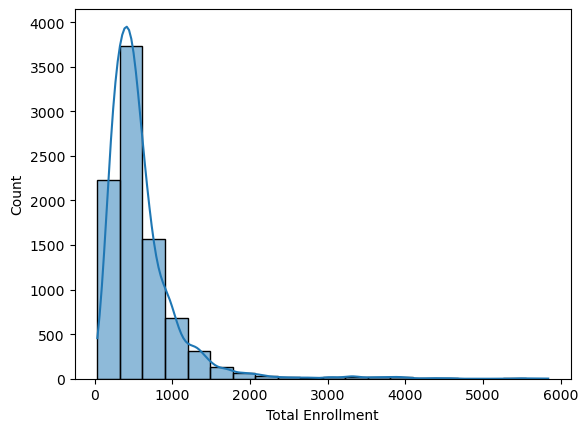

In [49]:
# Create a histogram for extreme values for total enrollment 

sns.histplot(df_merged['Total Enrollment'], bins=20, kde = True)

In [50]:
# Check how many extreme values

df_merged[df_merged['Total Enrollment'] >5000]

District Borough Number                     School Name     Year  \
3371                  13K430  Brooklyn Technical High School  2013-14   
3372                  13K430  Brooklyn Technical High School  2014-15   
3373                  13K430  Brooklyn Technical High School  2015-16   
3374                  13K430  Brooklyn Technical High School  2016-17   
3375                  13K430  Brooklyn Technical High School  2017-18   

      Total Enrollment  Grade PK (Half Day & Full Day)  Grade K  Grade 1  \
3371              5458                               0        0        0   
3372              5447                               0        0        0   
3373              5534                               0        0        0   
3374              5682                               0        0        0   
3375              5838                               0        0        0   

      Grade 2  Grade 3  Grade 4  ...  Location_Category_Description  \
3371        0        0        0  ...                    High school   
3372        0        0        0  ...                    High school   
3373        0        0        0  ...                    High school   
3374        0        0        0  ...                    High school   
3375        0        0        0  ...                    High school   

      Grades_final_text  primary_address_line_1  State_code  X_COORDINATE  \
3371        09,10,11,12      29 FT GREENE PLACE          NY      990785.0   
3372        09,10,11,12      29 FT GREENE PLACE          NY      990785.0   
3373        09,10,11,12      29 FT GREENE PLACE          NY      990785.0   
3374        09,10,11,12      29 FT GREENE PLACE          NY      990785.0   
3375        09,10,11,12      29 FT GREENE PLACE          NY      990785.0   

      Y_COORDINATE  LONGITUDE   LATITUDE     NTA_Name                    coord  
3371      190261.0 -73.976435  40.688896  Fort Greene  (40.688896, -73.976435)  
3372      190261.0 -73.976435  40.688896  Fort Greene  (40.688896, -73.976435)  
3373      190261.0 -73.976435  40.688896  Fort Greene  (40.688896, -73.976435)  
3374      190261.0 -73.976435  40.688896  Fort Greene  (40.688896, -73.976435)  
3375      190261.0 -73.976435  40.688896  Fort Greene  (40.688896, -73.976435)  

[5 rows x 39 columns]

In [51]:
# Clean extreme values
df_merged = df_merged[df_merged['Total Enrollment'] < 5000] 

<Axes: xlabel='% Poverty', ylabel='Count'>

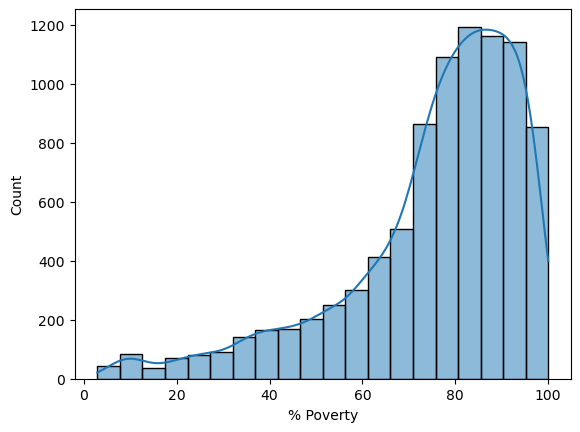

In [52]:
# Create a histogram for extreme values for poverty 

sns.histplot(df_merged['% Poverty'], bins=20, kde = True)

In [53]:
# Check how many extreme values

df_merged[df_merged['% Poverty'] >100]

Empty DataFrame
Columns: [District Borough Number, School Name, Year, Total Enrollment, Grade PK (Half Day & Full Day), Grade K, Grade 1, Grade 2, Grade 3, Grade 4, Grade 5, Grade 6, Grade 7, Grade 8, Grade 9, Grade 10, Grade 11, Grade 12, % Female, % Male, % Asian, % Black, % Hispanic, % Multiple Race Categories Not Represented, % White, % Students with Disabilities, % English Language Learners, % Poverty, Economic Need Index, Location_Category_Description, Grades_final_text, primary_address_line_1, State_code, X_COORDINATE, Y_COORDINATE, LONGITUDE, LATITUDE, NTA_Name, coord]
Index: []

[0 rows x 39 columns]

In [54]:
df_merged.shape

(8860, 39)

# Create choropleth maps

In [55]:
# Checking the JSON file contents:

f = open(r'/Users/lupeguevara/Documents/DOE Demographic Snapshot/02 Data/Original Data/schoolDistricts.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)(100)

{'type': 'Feature', 'id': 1, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.8205005943634, 40.8010197479856], [-73.8204059436285, 40.8006477808921], [-73.8203937074062, 40.8006536416275], [-73.8203782670089, 40.8006622348982], [-73.8203603958741, 40.8006711587593], [-73.8203415548403, 40.8006798812483], [-73.8203271270739, 40.8006864775147], [-73.8203114693555, 40.8006923525088], [-73.8202980146079, 40.8006986438847], [-73.8202828238847, 40.8007071025065], [-73.8202636942769, 40.8007170421061], [-73.8202470607303, 40.800724255269], [-73.8202248222852, 40.8007317404608], [-73.8202096728979, 40.8007379479337], [-73.8201940130654, 40.8007444340405], [-73.8201774176512, 40.8007508280546], [-73.8201632054123, 40.8007564617017], [-73.8201492879827, 40.8007628873637], [-73.8201306557646, 40.8007732048165], [-73.8201163957825, 40.8007832052629], [-73.8201020614665, 40.8007952586128], [-73.8200822652543, 40.8008107070458], [-73.8200707275134, 40.8008179021702], [-73.8200592165239, 40.800

TypeError: 'NoneType' object is not callable

In [56]:
# Finding average enrollment in each school district
avg_enrollment = df_merged.groupby(['coord'], as_index=False)['Total Enrollment'].mean()
avg_enrollment.head()

coord  Total Enrollment
0               (0.0, 0.0)             279.6
1      (40.5083, -74.2434)            1139.4
2   (40.508638, -74.24395)             498.8
3  (40.510207, -74.230118)             639.6
4  (40.512019, -74.218688)             528.2

In [57]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = schoolMap,
    data = avg_enrollment,
    columns = ['coord', 'Total Enrollment'],
    key_on = 'id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Avg Enrollment by District").add_to(map)
folium.LayerControl().add_to(map)

map

In [60]:
# Save map visualization
map.save('avg_enrollment_map.html')

In [73]:
# Creating a data frame with just the school districts and the values for poverty
poverty = df_merged.groupby(['coord'], as_index=False)['% Poverty'].sum()
poverty.head()

coord  % Poverty
0               (0.0, 0.0)      436.1
1      (40.5083, -74.2434)      166.8
2   (40.508638, -74.24395)      189.2
3  (40.510207, -74.230118)      190.2
4  (40.512019, -74.218688)      372.9

In [77]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = schoolMap,
    data = poverty,
    columns = ['coord', '% Poverty'],
    key_on = 'id',  # Update this line with the correct key *help from ChapGPT
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Poverty by School Districts"
).add_to(map)

folium.LayerControl().add_to(map)

map

In [78]:
# Save map visualization
map.save('poverty_map.html')

In [79]:
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'doe_demogr_location.pkl'))

# Discuss Results

### Analysis of Average Enrollment by School District:
- Enrollment Disparities: The map highlights disparities in enrollment across different school districts. Some districts have higher average enrollments, indicating potentially larger student populations and possibly higher demand for resources and infrastructure.
- The analysis revealed that enrollment varies across different grade levels, with higher enrollment typically seen in lower grades (e.g., PK, K) compared to higher grades (e.g., 11, 12).
- Over time, there may be fluctuations in enrollment, which could be influenced by various factors such as population changes, educational policies, and socioeconomic conditions.

### Analysis of Poverty Rate by School District:
- The map showcases the distribution of poverty rates among various school districts. It highlights areas with higher concentrations of poverty as well as those with lower poverty rates.
- Socioeconomic Disparities: Districts with higher poverty rates face unique challenges related to student well-being, academic performance, and access to resources. 
- High poverty rates can adversely affect educational outcomes, leading to disparities in academic achievement and graduation rates.

### Research Questions:

Existing Research Questions
- Did the school enrollment vary significantly across different grade levels?
- How does the enrollment distribution compare between different demographic groups?
- Are there any noticeable trends in enrollment over time?

Analysis Findings
- The analysis revealed that enrollment varies across different grade levels, with higher enrollment typically seen in lower grades (e.g., PK, K) compared to higher grades (e.g., 11, 12).
- There are variations in enrollment distribution among different demographic groups, with certain groups showing higher or lower enrollment percentages in specific grades.
- Over time, there may be fluctuations in enrollment, which could be influenced by various factors such as population changes, educational policies, and socioeconomic conditions.

New Research Questions
- How do enrollment patterns correlate with demographic shifts in the surrounding community?
- What factors contribute to the observed disparities in enrollment across different grade levels and demographic groups?
- Are there any strategies or interventions that can be implemented to address enrollment disparities and improve educational equity?